#### Name: Tan Leong Jun Joseph (U2321339H), Tan Zhe Kai (U2322419A)

# 3. Building of Models

Dataset from Kaggle: **"2019 Airline Delays w/ Weather and Airport Detail"** by *Jen Wadkins*

Source: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

- In this section, we will be building the classification models that would be used for prediction of whether a flight would be delayed or not.
- The target variable would be `DEP_DEL15`, which represents the flight being delayed more than 15 minutes.
- There are 5 machine learning algorithms used for building the classification models, such as the decision tree, random forest, AdaBoost, XGBoost and Naive Bayes.

## Table of Contents
1. [Decision Tree Classifier](#1)
    - 1.1 [Hyperparameter Tuning using GridSearchCV](#1.1)
2. [Random Forest Classifier](#2)
    - 2.1 [K-folds Cross Validation](#2.1)
3. [AdaBoost Classifier](#3)
4. [XGBoost Classifier](#4)
5. [Naive Bayes Classifier](#5)
6. [Summary of Classification Models](#6)
7. [Feature Importance on Best Model](#7)

### Importing necessary libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

### Load the cleaned dataset

In [70]:
# Load cleaned data
data = pd.read_csv('cleaned_data.csv')
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625398 entries, 0 to 5625397
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

Before we can use the data for building the models, we need to encode the categorical variables so that the model can understand for preprocessing as it only accepts numerical variables.

### Encoding the categorical variables

In [71]:
# Encoding the categorical variables

def label_encoder(catergoricalVar, df):
    for var in categoricalVar:
        df[var] = LabelEncoder().fit_transform(df[var])
    return df

categoricalVar = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT','PREVIOUS_AIRPORT']
data = label_encoder(categoricalVar, data)

data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,1,7,0,3,2,1,25,143,14,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
1,1,7,0,2,7,1,29,191,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
2,1,7,0,1,7,1,27,199,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
3,1,7,0,1,9,1,27,180,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
4,1,7,0,0,7,1,10,182,15,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0


### Splitting the dataset into train and test sets
- Target Variable: `DEP_DEL15` (Delay of more than 15mins)
- Predictor Variables: Remaining columns excluding `DEP_DEL15`
- **75%** for Training and **25%** for Testing

In [72]:
# Initialize the response and predictor
y_data = data['DEP_DEL15']
X_data = data.drop(['DEP_DEL15'], axis=1).values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=2)

# 1. Decision Tree Classifier <a id='1'/>

The first model will be built using Scikit-Learn's Decision Tree Classifier. Decision trees are supervised machine learning algorithms used for classification and regression problems.

In this problem, we will be using a decision tree classifier to predict flight delays on the target variable `DEP_DEL15`.

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 7.5\ngini = 0.304\nsamples = 4219048\nvalue = [3429041, 790007]\nclass = On-Time'),
 Text(0.25, 0.5, 'x[2] <= 3.5\ngini = 0.215\nsamples = 1987889\nvalue = [1743708, 244181]\nclass = On-Time'),
 Text(0.125, 0.16666666666666666, 'gini = 0.161\nsamples = 960786\nvalue = [875754, 85032]\nclass = On-Time'),
 Text(0.375, 0.16666666666666666, 'gini = 0.262\nsamples = 1027103\nvalue = [867954, 159149]\nclass = On-Time'),
 Text(0.75, 0.5, 'x[21] <= 0.135\ngini = 0.37\nsamples = 2231159\nvalue = [1685333, 545826]\nclass = On-Time'),
 Text(0.625, 0.16666666666666666, 'gini = 0.346\nsamples = 1887461\nvalue = [1468107, 419354]\nclass = On-Time'),
 Text(0.875, 0.16666666666666666, 'gini = 0.465\nsamples = 343698\nvalue = [217226, 126472]\nclass = On-Time')]

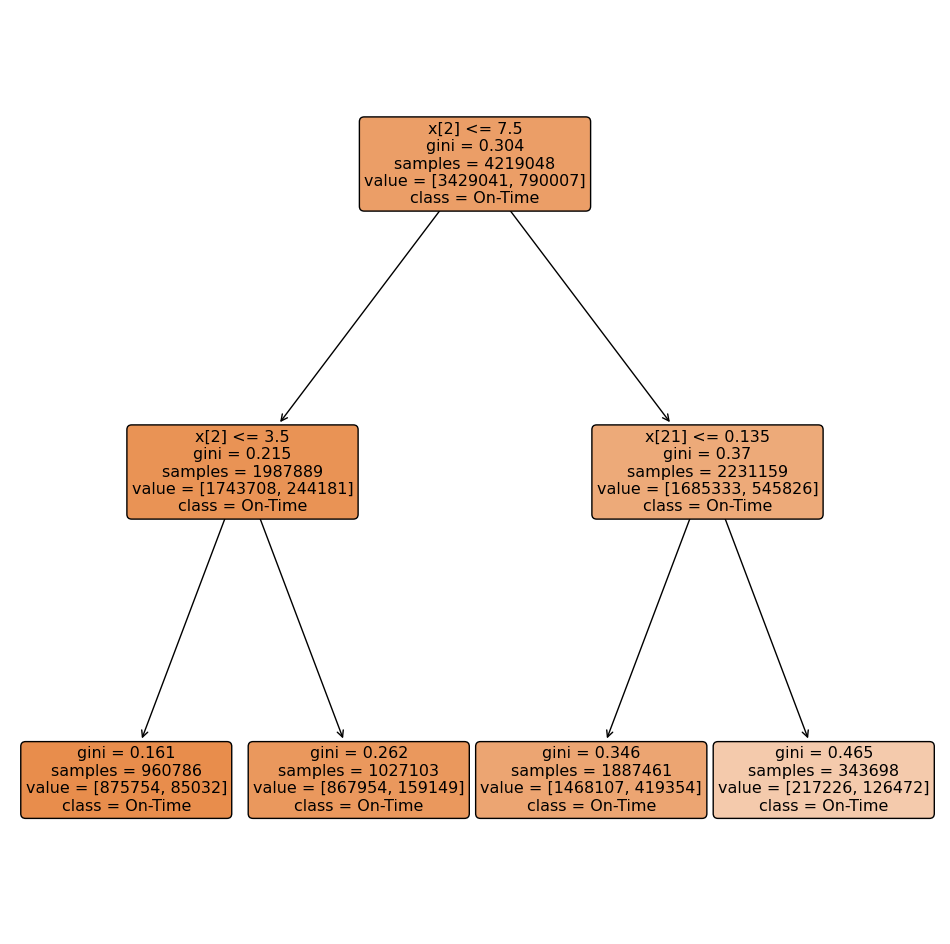

In [10]:
# Plot the trained decision tree
f = plt.figure(figsize=(12,12))
plot_tree(decision_tree, filled=True, rounded=True, 
          class_names=["On-Time","Delayed"])

## Metrics used to measure model performance

1. **Accuracy**: testing accuracy of the model.
1. **Precision**: a measure to show the number of positive predictions that are correct (True Positives).

        Precison = True Postives / (True Postives + False Positives)
    <br>

2. **Recall** (or Sensitivity): a measure to show the number of positive predictions over all the positive cases.

        Recall = True Positives / (True Positives + False Negatives)
    <br>
    
3. **F1-Score**: a measure of the combination of precision and recall.

        F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

Goodness Fit of Model
Training Accuracy:  0.8127523081036291
Testing Accuracy:  0.8131098233014541


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.0
Recall:  0.0
F1 Score:  0.0


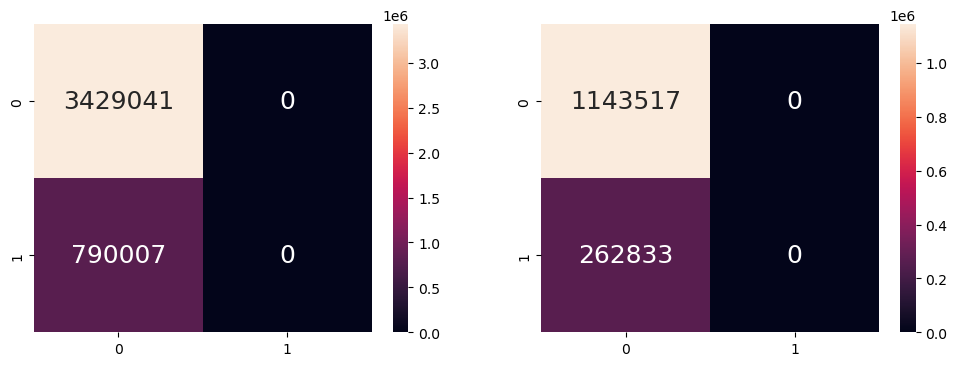

In [11]:
# Print the accuracy for train and test
print("Goodness Fit of Model")
print("Training Accuracy: ", decision_tree.score(X_train, y_train))
print("Testing Accuracy: ", decision_tree.score(X_test, y_test))

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

### Analysis of Decision Tree model
- Even though the accuracy model is decent, the precision, recall and F1-score speak a different storey. 
- The false positive (FP) and true negative (TN) are 0.
- This means that the model failed to predict a single delayed flight.
- Hence, the model is not accurate even though it has an accuracy of 81%.
- This 81% just means that the model is accurate in predicting on-time flights.

<br>

To counter this issue, we decided to perform hyperparameter tuning using GridSearchCV.
- To find the best hyperparameters to obtain the best resulting model.

## 1.1 Hyperparameter Tuning using GridSearch on Decision Tree Classifer <a id='1.1'/>

In [19]:
dt = tree.DecisionTreeClassifier(max_depth=2)

param_grid = {"criterion": ['gini','entropy'],
              "max_depth": [2,3,4]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

gs = gs.fit(X_train, y_train)
print("Best accuracy score: ", gs.best_score_)
print("Best parameters:\n", gs.best_params_)

Best accuracy score:  0.812847353207449
Best parameters:
 {'criterion': 'gini', 'max_depth': 4}


Goodness Fit of Model
Training Accuracy:  0.8127731658895562
Testing Accuracy:  0.8131304440573115
Precision:  0.6705882352941176
Recall:  0.0002168677449178756
F1 Score:  0.0004335952654439787


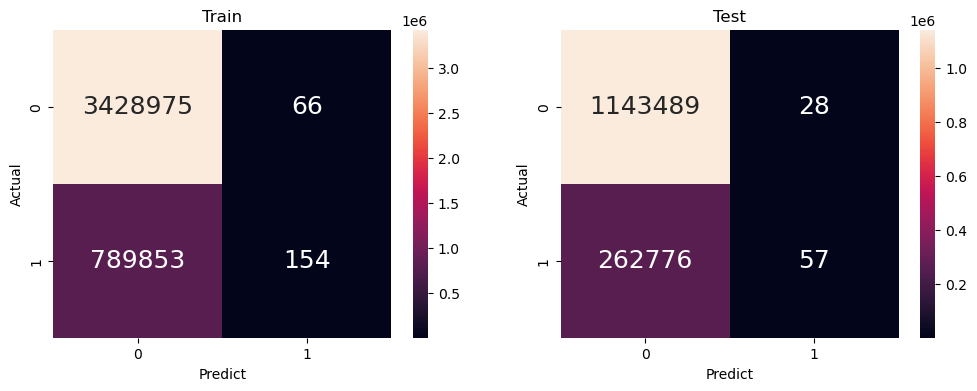

In [13]:
# Create the decision tree with the above hyperparameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
dt.fit(X_train, y_train)

# Print the accuracy for train and test
print("Goodness Fit of Model")
print("Training Accuracy: ", dt.score(X_train, y_train))
print("Testing Accuracy: ", dt.score(X_test, y_test))

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[0].set_title('Train')
axes[0].set_xlabel('Predict')
axes[0].set_ylabel('Actual')
axes[1].set_title('Test')
axes[1].set_xlabel('Predict')
axes[1].set_ylabel('Actual')

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

[Text(0.5, 0.9, 'x[2] <= 7.5\ngini = 0.304\nsamples = 4219048\nvalue = [3429041, 790007]\nclass = On-Time'),
 Text(0.25, 0.7, 'x[2] <= 3.5\ngini = 0.215\nsamples = 1987889\nvalue = [1743708, 244181]\nclass = On-Time'),
 Text(0.125, 0.5, 'x[4] <= 1.5\ngini = 0.161\nsamples = 960786\nvalue = [875754, 85032]\nclass = On-Time'),
 Text(0.0625, 0.3, 'x[12] <= 12102389.0\ngini = 0.145\nsamples = 747886\nvalue = [689026, 58860]\nclass = On-Time'),
 Text(0.03125, 0.1, 'gini = 0.168\nsamples = 474955\nvalue = [430906, 44049]\nclass = On-Time'),
 Text(0.09375, 0.1, 'gini = 0.103\nsamples = 272931\nvalue = [258120, 14811]\nclass = On-Time'),
 Text(0.1875, 0.3, 'x[4] <= 2.5\ngini = 0.216\nsamples = 212900\nvalue = [186728, 26172]\nclass = On-Time'),
 Text(0.15625, 0.1, 'gini = 0.208\nsamples = 202583\nvalue = [178667, 23916]\nclass = On-Time'),
 Text(0.21875, 0.1, 'gini = 0.342\nsamples = 10317\nvalue = [8061, 2256]\nclass = On-Time'),
 Text(0.375, 0.5, 'x[21] <= 0.155\ngini = 0.262\nsamples = 1027

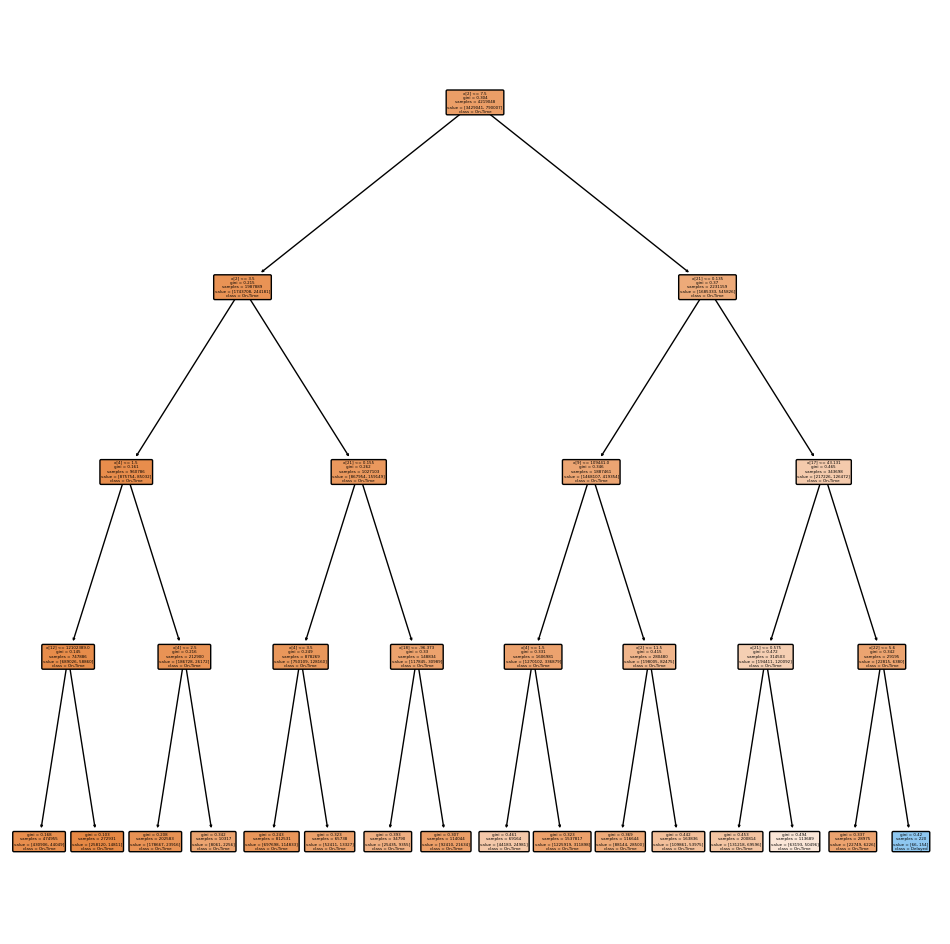

In [14]:
# Plot the trained decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dt, filled=True, rounded=True, 
          class_names=["On-Time","Delayed"])

### Analysis of Decision Tree model after GridSearch
- The model accuracy remains unchanged as it has similar training and testing accuracy of 81%.
- However, the new model managed to predict some of the delayed flights correctly, which is an improvement as compared to the base model.
- Although the model has a precision score of 61%, the resulting F1-score was 0% as the recall score 0%. This shows that the model is not as sensitive in predicting the flight delays.
- We explore other models to try and obtain better results.

# 2. Random Forest Classifier <a id='2'/>

- Random Forest is the combination of multiple decision trees to achieve an output.
- Random forest tends to prevent overfitting, unlike the decision tree which may be simple to interpret but risk overfitting.

Training Accuracy:  0.9928983979324245
Testing Accuracy:  0.8204927649589363
Precision:  0.5545445949211486
Recall:  0.20081572709667356
F1 Score:  0.2948560383450834


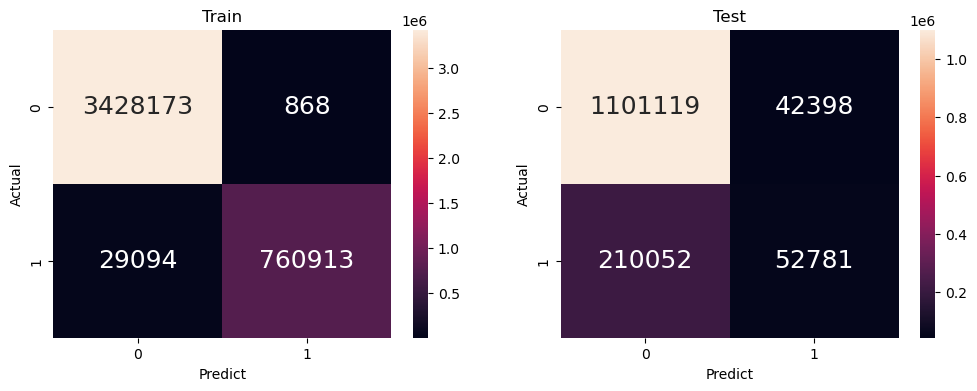

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

print('Training Accuracy: ', rf.score(X_train,y_train))
print('Testing Accuracy: ', rf.score(X_test,y_test))

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[0].set_title('Train')
axes[0].set_xlabel('Predict')
axes[0].set_ylabel('Actual')
axes[1].set_title('Test')
axes[1].set_xlabel('Predict')
axes[1].set_ylabel('Actual')

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

## 2.1 K-folds Cross Validation <a id='2.1'/>

- To further evaluate the performance of the model, we used K-folds cross validation.
- K-fold cross validation bascially splits the training set into k-folds and take the average of all the resulting accuracies to obtain the cross validation accuracy.
- This allows us to determine the true performace of the model and also reduce overfitting the model.

In [18]:
from sklearn.model_selection import cross_val_score, cross_validate

results = cross_validate(rf, X_data, y_data, scoring = 'accuracy', cv=2, return_train_score = True)
print('Train score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train score:  [0.99267074 0.99303196]
Test Score:  [0.19324642 0.81298888]


In [20]:
print('Cross Validation Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('Cross Validation Testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

Cross Validation Training Accuracy:  0.9928513502511289
Cross Validation Testing Accuracy:  0.5031176460758866


### Analysis of Random Forest Classifier
- The random forest model managed to generate increasingly better results as compared to the decision tree models built previously.
- It had nearly perfect training accuracy of 99% and slightly better testing accuracy of 82%.
- Although the precision score was lower than the previous model, the F1-score of 29% compensates for that.
- This proves that this model is more reliant on predicting flight delays as compared to the decision tree model.
- After cross evaluating the model using k-folds, the accuracy of the model decreased significant. This could be due to the k-fold selection on the training set which had insufficient data with delayed flights.
- We further explore other unique machine learning algorithms such as AdaBoost and XGBoost.

# 3. AdaBoost Classifier <a id='3'/>

#### What is AdaBoost?
AdaBoost stands for Adaptive Boosting, which is used in machine learning for boosting in the Ensemble phase. 
1. It combines multiple classifiers to obtain a better accuracy.
2. At each iteration, weights are set on the classifiers depending on the accuracy of the classifier.
3. Higher weights are assigned to wrongly classified observations, allowing the next iteration to have higher probability for classification.
4. This continues to iterate until the training data fits with no error or the number of estimators are met.

More information about **AdaBoost Classifier** can be found here:
https://www.datacamp.com/tutorial/adaboost-classifier-python

Goodness Fit of Model
Training Accuracy:  0.8128528047085504
Testing Accuracy:  0.8131994169303516
Precision:  0.5435684647302904
Recall:  0.002990492061499127
F1 Score:  0.0059482592260452025


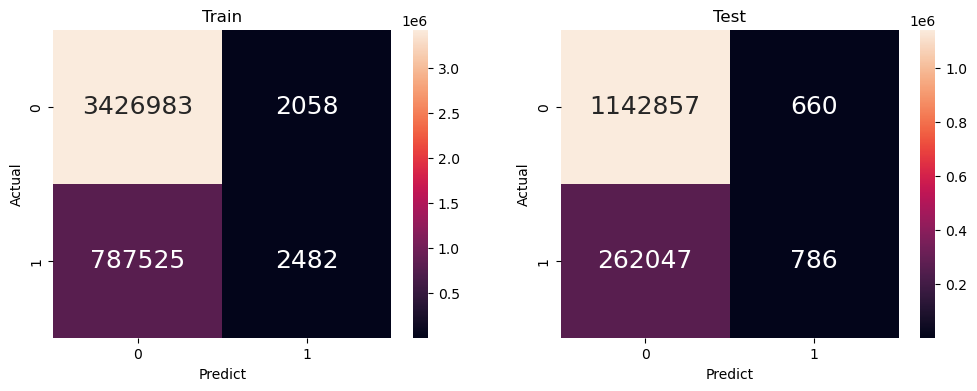

In [17]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=20, learning_rate=1)
adb.fit(X_train, y_train)

print('Goodness Fit of Model')
print('Training Accuracy: ', adb.score(X_train, y_train))
print('Testing Accuracy: ', adb.score(X_test, y_test))

y_train_pred = adb.predict(X_train)
y_test_pred = adb.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[0].set_title('Train')
axes[0].set_xlabel('Predict')
axes[0].set_ylabel('Actual')
axes[1].set_title('Test')
axes[1].set_xlabel('Predict')
axes[1].set_ylabel('Actual')

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

### Analysis of AdaBoost Classifier
- The model had an overall accuracy of 81% on both the training and testing dataset. 
- This were similar results to the decision tree base model.
- The model underperformed as compared to the random forest classifier as it has an F1-score of 0%.

# 4. XGBoost Classifier <a id='4'/>

#### What is XGBoost?

- XGBoost stands for Extreme Gradient Boosting. 
- It is a supervised machine learning algorithm that combines multiple individual models, which generates better outputs after each iteration.
- This method is often used in ensemble phase to boost the performance of models.

More information about **XGBoost** can be found here: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

Training Accuracy:  0.8236329617487168
Testing Accuracy:  0.8228328652184733
Precision:  0.6611587780501603
Recall:  0.1067179539859911
F1 Score:  0.18377301749018038


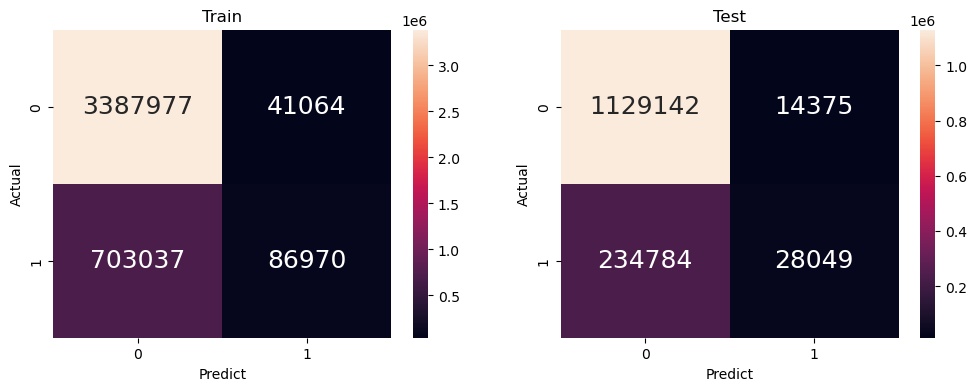

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print('Training Accuracy: ', xgb.score(X_train, y_train))
print('Testing Accuracy: ', xgb.score(X_test, y_test))

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[0].set_title('Train')
axes[0].set_xlabel('Predict')
axes[0].set_ylabel('Actual')
axes[1].set_title('Test')
axes[1].set_xlabel('Predict')
axes[1].set_ylabel('Actual')

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

### Analysis of XGBoost Classifier
- The model has generated slightly better accuracy of 82% for both the training and testing.
- Despite the high precision score of 66%, the model underperformed as its sensitivity is rather low with a recall score of 10%.
- This caused the model to have a low F1-score, which means that the model is unreliable in the prediction problem.

# 5. Naive Bayes Classifier <a id='5'/>

#### What is the Naive Bayes Classifer?

- The Naive Bayes Classifier uses probabilistic calculations to determine the performance of the model.
- It is a supervised machine learning algorithm that takes the assumption that the features are unrelated to each other.

More about **Naive Bayes** can be found here: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Training Accuracy:  0.8127523081036291
Testing Accuracy:  0.8131098233014541


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.0
Recall:  0.0
F1 Score:  0.0


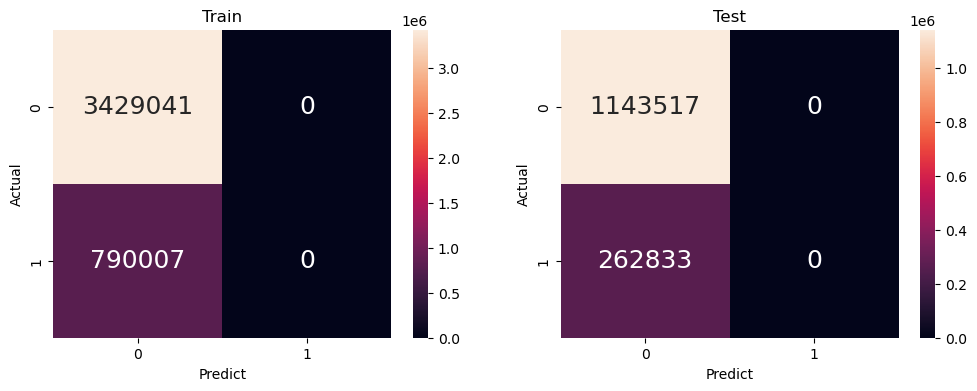

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Training Accuracy: ', gnb.score(X_train, y_train))
print('Testing Accuracy: ', gnb.score(X_test, y_test))

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[0].set_title('Train')
axes[0].set_xlabel('Predict')
axes[0].set_ylabel('Actual')
axes[1].set_title('Test')
axes[1].set_xlabel('Predict')
axes[1].set_ylabel('Actual')

print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))

### Analysis of Naive Baiers Classifier
- The results of this model is similar to the base decision tree model.
- Both the base decision tree model and this model have the same training accuracy, testing accuracy, recall and F1-score.
- The only difference is that the Naive Baiers classifier lacks in precision with a score of 0%.
- As mentioned previously in the analysis of the base decision tree model, a model with an F1-score of 0% means that the model is not reliant in the prediction problem.

# 6. Summary of Classification Models <a id='6'/>

| Model | Train Accuracy | Test Accuracy | Precision | Recall | F1-Score |
| :-: | :-: | :-: | :-: | :-: | :-: |
| Decision Tree | 81.3% | 81.3% | 67.0% | 0.0 | 0.0 |
| Random Forest | 99.3% | 82.0% | 55.5% | 20.1% | 29.5% |
| AdaBoost | 81.3% | 81.3% | 54.4% | 0.0% | 1.0% |
| XGBoost | 82.4% | 82.3% | 66.1% | 10.7% | 18.4% |
| Naive Bayes | 81.3% | 81.3% | 0.0% | 0.0% | 0.0% |

### Ranking of Classification Models
*(Note: based on test accuracy and F1-score)*
1. Random Forest
2. XGBoost
3. AdaBoost

#### Why **Random Forest** is the best performing model?
- Highest training accuracy: `99.3%`
- Second highest testing accuracy: `82.0%`
- Highest F1-score: `29.5%`



#### Why Decision Tree and Naive Bayes performed poorly?
- Decision Tree and Naive Bayes have an F1-Score of 0.
- Both models had `0` True Negatives, which shows that the models did not predict any flight delays correctly.
- These two models performed poorly as compared to the other models.

# 7. Feature Importances on Best Model - Random Forest <a id='7'/>

**Purpose**: To find out the features/variables that contribute to determining the target variable value.

- Feature importances is a Scikit-Learn package that identifies the most important features of a tree. 
- These features appear towards the root of the tree, while the unimportant features will appear closer to the leaves. 
- The important features are calculated based on the average depth where it they appear across all trees in the forest.

In [67]:
test = data.drop(['DEP_DEL15'], axis=1)
pd.concat((pd.DataFrame(test.columns, columns = ['Variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['Importance'])), 
          axis = 1).sort_values(by='Importance', ascending = False)

,Variable,Importance
15,PLANE_AGE,0.096223
19,PREVIOUS_AIRPORT,0.092637
5,CONCURRENT_FLIGHTS,0.082243
2,DEP_TIME_BLK,0.079219
20,AWND,0.077038
24,TMAX,0.071617
25,TMIN,0.069706
3,DISTANCE_GROUP,0.057127
4,SEGMENT_NUMBER,0.047861
1,DAY_OF_WEEK,0.047721


**Observations**:

The top 5 important features are identified below:
1. `PLANE_AGE` - Age of aircraft
2. `PREVIOUS_AIRPORT` - Previous airport it operated at
3. `CONCURRENT_FLIGHTS` - Number of concurrent flights
4. `DEP_TIME_BLK` - The time block of flight departure
5. `AWND` - Max wind speed for the day

### How do these variables contribute to the occurence of flight delays?
1. **Plane age**
- It makes sense that the age of the plane impacts the occurence of a flight delay.
- The **older** the plane, the **higher the chances of encountering technical issues** that require downtime to resolve.
- This can lead to flight delays.

2. **Previous airport**
- The previous airport can determine whether the flight would be delay at the current airport.
- For example, if a flight was delayed at the previous airport due to the poor traffic management, this could impact the following flight schedules planned for the plane.

3. **Concurrent flights**
- The number of concurrent flights does play a huge part in determining whether if a flight would be on-time or delayed.
- The concurrent flights is determined based on the total number of flights departing at the same time of the day.
- If there is a higher number of concurrent flights, there is a greater chance for flight delays due to flight congestions.

4. **Departure time block**
- Essentially means the time of flight departure.
- Certain time slots of the day would have the most of flights operating due to traveller demand, hence there are channces of experiencing flight delays.
- From the EDA, we found out that the most peak flight timings were during the 1700hrs to 2000hrs.
- Although a flight may be scheduled for departure, it also has to consider the weather conditions.

5. **Max wind speed**
- The max wind speed does impact the chances of a flight delay.
- Studies have shown that crosswind speeds of more than 40mph can cause commercial aircrafts from taking off.